In [1]:
!pip install git+https://www.github.com/mouseland/cellpose.git

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Cloning https://www.github.com/mouseland/cellpose.git to /private/var/folders/07/b7qwj15d1zs41kh2whcqhh0c0000gp/T/pip-req-build-ej8n88fs
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git /private/var/folders/07/b7qwj15d1zs41kh2whcqhh0c0000gp/T/pip-req-build-ej8n88fs
  Resolved https://www.github.com/mouseland/cellpose.git to commit 17fb25f40055ec2636aa708dc4cf6625b8b4735d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 42.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.8/652.8 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.4 MB/s eta 0:00:0000:0100:01
     ━━━

In [1]:
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt
from natsort import natsorted

io.logger_setup() # run this to get printing of progress

#Check if notebook instance has GPU access
if core.use_gpu()==False:
  raise ImportError("No GPU access, change your runtime")

model = models.CellposeModel(gpu=True)

2025-12-30 14:52:59,552 [INFO] WRITING LOG OUTPUT TO /Users/Chris/.cellpose/run.log
2025-12-30 14:52:59,553 [INFO] 
cellpose version: 	4.0.8 
platform:       	darwin 
python version: 	3.10.5 
torch version:  	2.9.1
2025-12-30 14:52:59,571 [INFO] ** TORCH MPS version installed and working. **
2025-12-30 14:52:59,572 [INFO] ** TORCH MPS version installed and working. **
2025-12-30 14:52:59,572 [INFO] >>>> using GPU (MPS)
2025-12-30 14:53:00,252 [INFO] >>>> loading model /Users/Chris/.cellpose/models/cpsam


In [3]:
dir = "/Users/Chris/Downloads/data_tnbc/TNBC_NucleiSegmentation/TNBC_NucleiSegmentation/Slide_01"
dir = Path(dir)
if not dir.exists():
  raise FileNotFoundError("directory does not exist")

# *** change to your image extension ***
image_ext = ".png"

# list all files
files = natsorted([f for f in dir.glob("*"+image_ext) if "_masks" not in f.name and "_flows" not in f.name])

if(len(files)==0):
  raise FileNotFoundError("no image files found, did you specify the correct folder and extension?")
else:
  print(f"{len(files)} images in folder:")

for f in files:
  print(f.name)

7 images in folder:
01_1.png
01_2.png
01_3.png
01_4.png
01_5.png
01_6.png
01_7.png


In [5]:
img = io.imread(files[0])

print(f'your image has shape: {img.shape}. Assuming channel dimension is last with {img.shape[-1]} channels')

your image has shape: (512, 512, 3). Assuming channel dimension is last with 3 channels


In [7]:
first_channel = '0' # @param ['None', 0, 1, 2, 3, 4, 5]
second_channel = '1' # @param ['None', 0, 1, 2, 3, 4, 5]
third_channel = '2' # @param ['None', 0, 1, 2, 3, 4, 5]

2025-12-30 16:02:22,134 [INFO] processing image with (512, 512) HW, and 3 channels


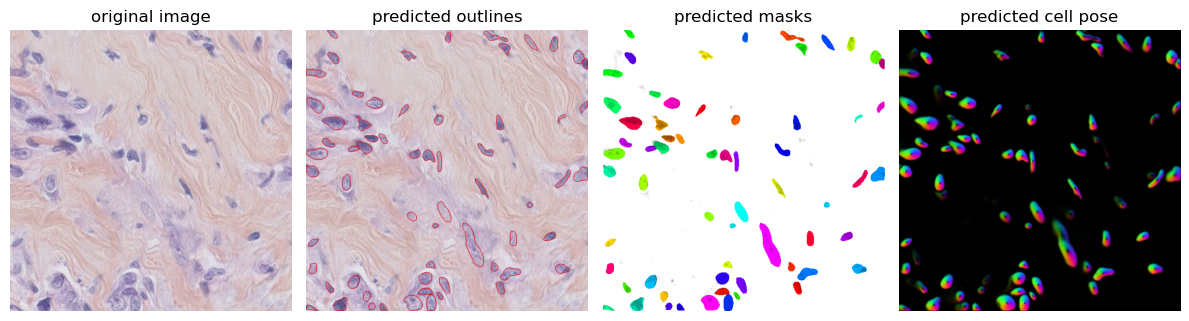

In [13]:
selected_channels = []
for i, c in enumerate([first_channel, second_channel, third_channel]):
  if c == 'None':
    continue
  if int(c) > img.shape[-1]:
    assert False, 'invalid channel index, must have index greater or equal to the number of channels'
  if c != 'None':
    selected_channels.append(int(c))



img_selected_channels = np.zeros_like(img)
img_selected_channels[:, :, :len(selected_channels)] = img[:, :, selected_channels]


flow_threshold = 0.4
cellprob_threshold = 0.0
tile_norm_blocksize = 0

masks, flows, styles = model.eval(img_selected_channels, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img_selected_channels, masks, flows[0])
plt.tight_layout()
plt.show()

In [23]:
masks_ext = ".png" if image_ext == ".png" else ".tif"
for i in trange(len(files)):
    f = files[i]
    img = io.imread(f)
    masks, flows, styles = model.eval(img, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})
    io.imsave(dir / (f.stem + "_masks" + masks_ext), masks)

  0%|                                                   | 0/7 [00:00<?, ?it/s]

2025-12-30 14:38:58,803 [INFO] processing image with (512, 512) HW, and 3 channels


 14%|██████▏                                    | 1/7 [00:04<00:27,  4.66s/it]

2025-12-30 14:39:03,451 [INFO] processing image with (512, 512) HW, and 3 channels


 29%|████████████▎                              | 2/7 [00:09<00:22,  4.54s/it]

2025-12-30 14:39:07,914 [INFO] processing image with (512, 512) HW, and 3 channels


 43%|██████████████████▍                        | 3/7 [00:13<00:17,  4.45s/it]

2025-12-30 14:39:12,259 [INFO] processing image with (512, 512) HW, and 3 channels


 57%|████████████████████████▌                  | 4/7 [00:17<00:13,  4.41s/it]

2025-12-30 14:39:16,609 [INFO] processing image with (512, 512) HW, and 3 channels


 71%|██████████████████████████████▋            | 5/7 [00:22<00:08,  4.39s/it]

2025-12-30 14:39:20,950 [INFO] processing image with (512, 512) HW, and 3 channels


 86%|████████████████████████████████████▊      | 6/7 [00:26<00:04,  4.37s/it]

2025-12-30 14:39:25,275 [INFO] processing image with (512, 512) HW, and 3 channels


100%|███████████████████████████████████████████| 7/7 [00:30<00:00,  4.40s/it]


In [25]:
print("loading images")
imgs = [io.imread(files[i]) for i in trange(len(files))]

print("running cellpose-SAM")
masks, flows, styles = model.eval(imgs, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

print("saving masks")
for i in trange(len(files)):
    f = files[i]
    io.imsave(dir / (f.stem + "_masks" + masks_ext), masks[i])

loading images


100%|██████████████████████████████████████████| 7/7 [00:00<00:00, 133.34it/s]

running cellpose-SAM
2025-12-30 14:41:50,791 [INFO] 0%|          | 0/7 [00:00<?, ?it/s]
2025-12-30 14:41:50,793 [INFO] processing image with (512, 512) HW, and 3 channels


2025-12-30 14:41:55,667 [INFO] processing image with (512, 512) HW, and 3 channels
2025-12-30 14:42:00,078 [INFO] processing image with (512, 512) HW, and 3 channels
2025-12-30 14:42:04,465 [INFO] processing image with (512, 512) HW, and 3 channels
2025-12-30 14:42:08,819 [INFO] processing image with (512, 512) HW, and 3 channels
2025-12-30 14:42:13,165 [INFO] processing image with (512, 512) HW, and 3 channels
2025-12-30 14:42:17,488 [INFO] processing image with (512, 512) HW, and 3 channels
2025-12-30 14:42:21,855 [INFO] 100%|##########| 7/7 [00:31<00:00,  4.44s/it]
saving masks


100%|█████████████████████████████████████████| 7/7 [00:00<00:00, 1192.29it/s]



Processing file: 01_1.png
2025-12-30 21:16:57,903 [INFO] processing image with (512, 512) HW, and 3 channels


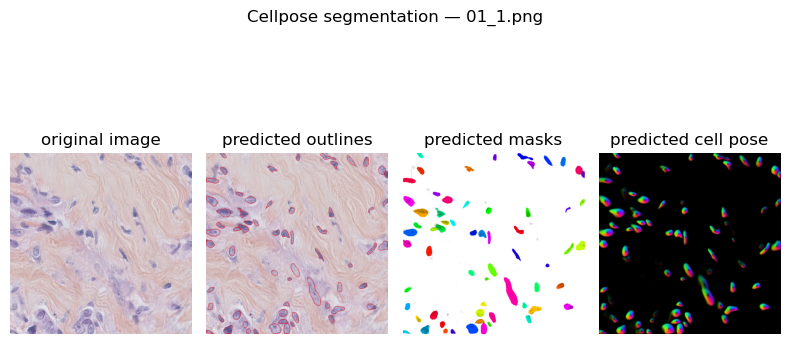


Processing file: 01_2.png
2025-12-30 21:17:02,894 [INFO] processing image with (512, 512) HW, and 3 channels


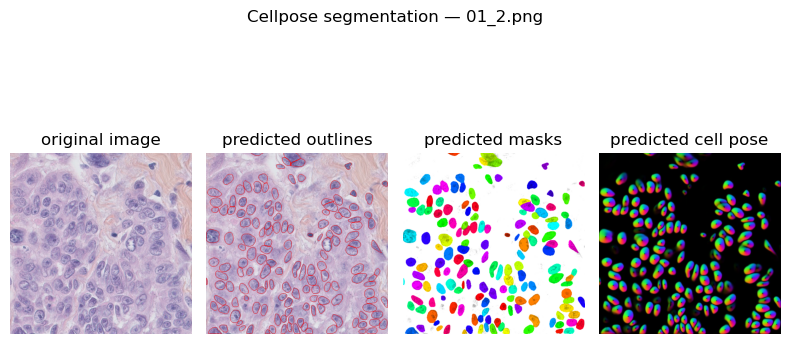


Processing file: 01_3.png
2025-12-30 21:17:07,571 [INFO] processing image with (512, 512) HW, and 3 channels


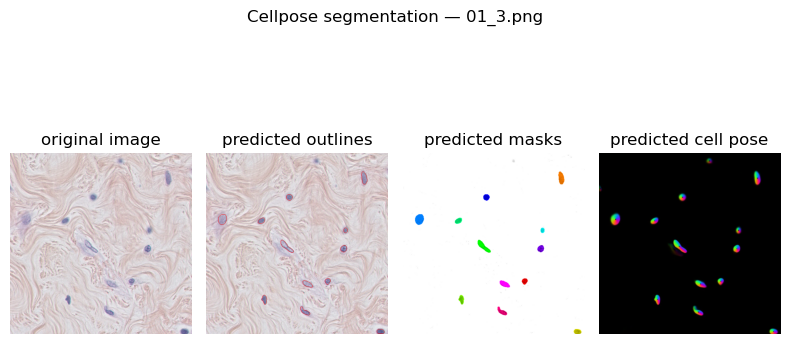


Processing file: 01_4.png
2025-12-30 21:17:12,037 [INFO] processing image with (512, 512) HW, and 3 channels


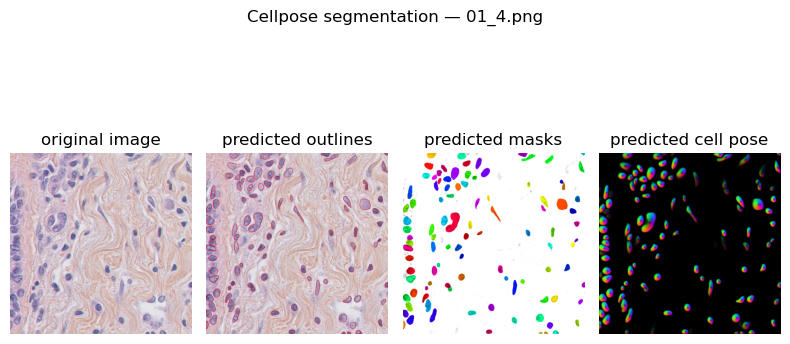


Processing file: 01_5.png
2025-12-30 21:17:16,564 [INFO] processing image with (512, 512) HW, and 3 channels


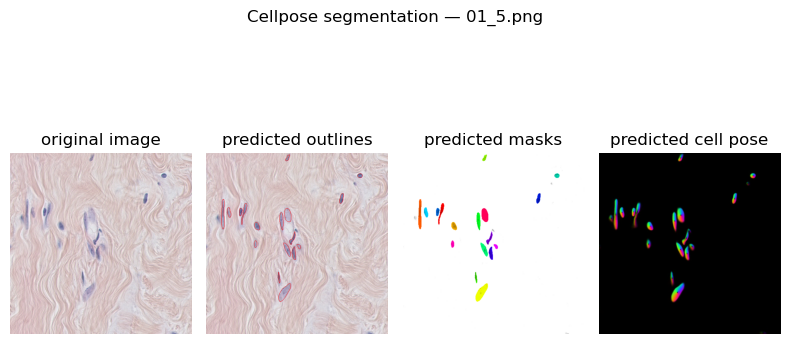


Processing file: 01_6.png
2025-12-30 21:17:21,032 [INFO] processing image with (512, 512) HW, and 3 channels


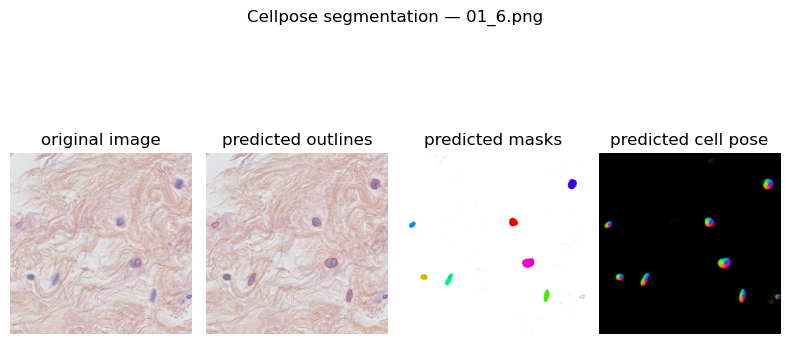


Processing file: 01_7.png
2025-12-30 21:17:25,478 [INFO] processing image with (512, 512) HW, and 3 channels


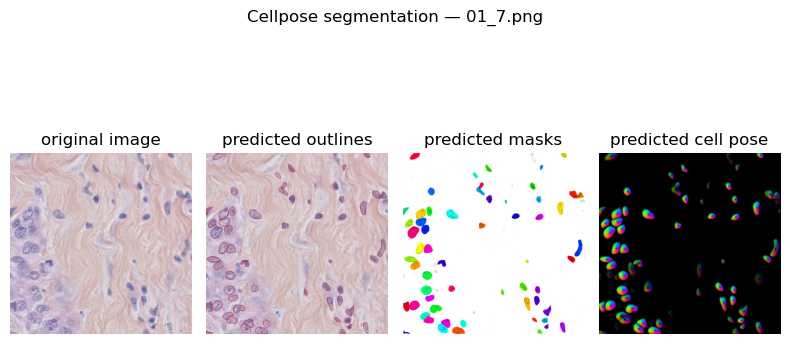

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import io, plot

flow_threshold = 0.4
cellprob_threshold = 0.0
tile_norm_blocksize = 0

for f in files:
    # ---- clean, readable console output ----
    print("\n" + "=" * 60)
    print(f"Processing file: {f.name}")
    print("=" * 60)

    # read image
    img = io.imread(f)

    # ----- select channels -----
    selected_channels = []
    for c in [first_channel, second_channel, third_channel]:
        if c == "None":
            continue
        c = int(c)
        if c >= img.shape[-1]:
            raise ValueError(f"Invalid channel index {c} for image with {img.shape[-1]} channels")
        selected_channels.append(c)

    img_selected_channels = np.zeros_like(img)
    img_selected_channels[:, :, :len(selected_channels)] = img[:, :, selected_channels]

    # ----- run Cellpose -----
    masks, flows, styles = model.eval(
        img_selected_channels,
        batch_size=32,
        flow_threshold=flow_threshold,
        cellprob_threshold=cellprob_threshold,
        normalize={"tile_norm_blocksize": tile_norm_blocksize},
    )

    # ----- show result (clean title + spacing) -----
    fig = plt.figure(figsize=(8, 4))  # wider looks nicer for the 3-panel output
    plot.show_segmentation(fig, img_selected_channels, masks, flows[0])

    # Put title above the whole figure (cleaner than plt.title)
    fig.suptitle(f"Cellpose segmentation — {f.name}", fontsize=12, y=1.02)

    # Add spacing so title doesn't collide with panels
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    plt.show()
    plt.close(fig)